In [2]:
import numpy as np 
import matplotlib.pyplot as plt

    Se ha muestreado una señal de t-continuo a una F_s=100Hz, obteniéndose la siguiente secuencia x(n):
    
                                                    x(n)=3sin(3πn/5+π/4)

        1. Suponiendo que hay aliasing, ¿cuál es el conjunto de frecuencias que pueden generar dicha secuencia? Grafica al menos dos posibles señales de t-continuo junto con x(n).
        2. De la señal se toman 5 puntos con los que se calcula la TDF. ¿Cuál es la resolución espectral?.
        3. ¿Cuántas muestras deberías tomar para no tener fuga espectral?.
        4. Reconstruye 5 ciclos de la señal en el dominio de t-continuo tomando para x(n) la cantidad de puntos que determinaste en el ítem (4).


- - -

### Apartado 1

#### (3πn/5) = (2π(Fo/Fs)n) --> Fo = 30 Hz (Frecuencia de Alias). Es la frecuencia de mi señal.

#### El conjunto de frecuencias las cuales tienen "Aliasing" son: Fk = Fo + k Fs.

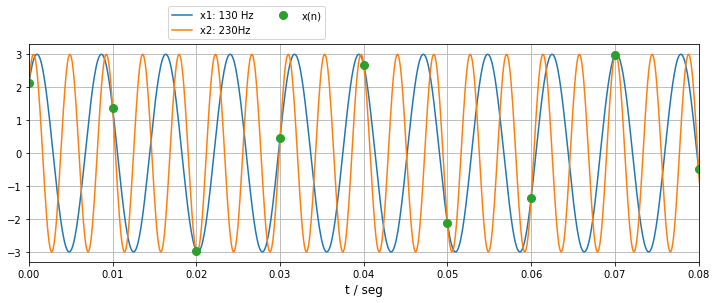

In [3]:
Fs = 100
Fo = 30

t = np.arange(0,1,0.0001)
n =np.arange(0,len(t))

k1 = 1 ; Fk1 = Fo + k1*Fs
k2 = 2 ; Fk2 = Fo + k2*Fs

xn = 3*np.sin((3*np.pi*n/5)+(np.pi/4))
x1 = 3*np.sin((2*np.pi*Fk1*t)+(np.pi/4))
x2 = 3*np.sin((2*np.pi*Fk2*t)+(np.pi/4))


#En función del tiempo
plt.figure(figsize=(12,4))
plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(n/Fs,xn,"o",ms=8)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('x1: 130 Hz',"x2: 230Hz","x(n)"),ncol=2,prop={'size':10},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.xlim(0,0.08)
plt.show()

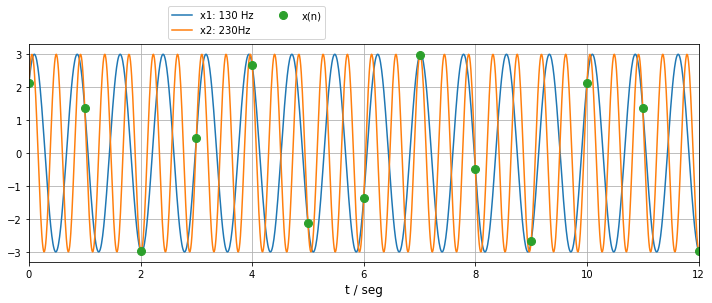

In [4]:
#En función de las muestras
plt.figure(figsize=(12,4))
plt.plot(t*Fs,x1)
plt.plot(t*Fs,x2)
plt.plot(n,xn,"o",ms=8)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('x1: 130 Hz',"x2: 230Hz","x(n)"),ncol=2,prop={'size':10},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.xlim(0,12)
plt.show()

- - -

### Apartado 2

In [5]:
#RESOLUCIÓN ESPECTRAL

N = 5
print (f"Como se tomaron 5 puntos, la resolución espectral es: {Fs/N}")

Como se tomaron 5 puntos, la resolución espectral es: 20.0


Mientras menor sea la resolución espectral, será mejor. Esto significa que entre punto y punto tenemos 20 Hz.

- - -

### Apartado 3

##### Cuando no se toman ciclos enteros, se tienen fugas expectrales y se producen las frecuencias impurias.

##### 2π.f.Np = 2πk --> f = k/Np 

##### Siendo f = Fo/Fs = 3/10

##### Entonces 3/10 = k/Np ---> k = 3 y Np = 10.


##### Por lo que la cantidad de puntos que necesitamos para no tener fugas espectrales es de Np = 10.

In [13]:
from scipy.fftpack import fft, fftfreq

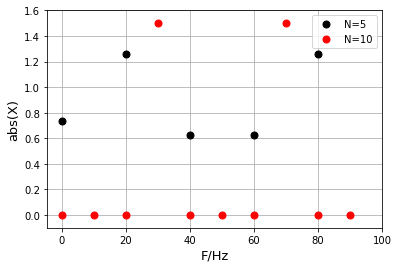

In [22]:
X = fft (xn[0:N]) / N #con N=5
p = np.arange (len(X))

N1 = 10
X1 = fft (xn[0:N1]) / N1 #con N=10
p1 = np.arange (len(X1))


plt.plot (p*Fs/N,abs(X),"ko",ms=7)
plt.plot (p1*Fs/N1,abs(X1),"ro",ms=7)
plt.ylabel ("abs(X)",fontsize=13)
plt.xlabel ("F/Hz",fontsize=13)
plt.xticks (np.arange(0,110,20))
plt.legend(('N=5',"N=10"))
plt.ylim (-0.1,1.6)
plt.grid (True)
plt.show()

- - -

### Apartado 4

In [25]:
import import_ipynb
from FReconstrucciondeseñalesapartirdemuestras import h

importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb


In [31]:
#Para reconstruir la señal con el espectro

n = np.arange (5*N1)
x5 = np.zeros (len(n),dtype=complex)
s = 0
for i in range (0,N1):
    s = s + X1 [i] * np.exp (1j*2*np.pi*i*n/N1) #trabajo con el espectro
x5 = s

<string>:10: ComplexWarning: Casting complex values to real discards the imaginary part
<string>:9: RuntimeWarning: invalid value encountered in cdouble_scalars
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


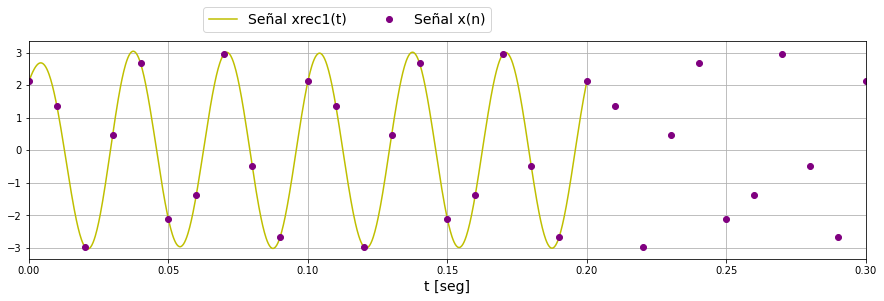

In [34]:
xa_rec = h(1000,5000,x5,100) # h(n, Fs, datos, Fs1) ... Fs >> Fs1
t1 = np.arange(len(xa_rec))/5000

plt.figure(figsize=(15,4))
plt.plot(t1,xa_rec,c='y')
plt.plot(n/Fs,x5,'o', c='purple')
plt.grid()
plt.xlabel('t [seg]', fontsize=14)
plt.legend(('Señal xrec1(t)','Señal x(n)'),prop={'size':14},ncol=2,bbox_to_anchor=(0.2,1.01))
plt.xlim(0,0.3)
plt.show()

<string>:9: RuntimeWarning: invalid value encountered in double_scalars


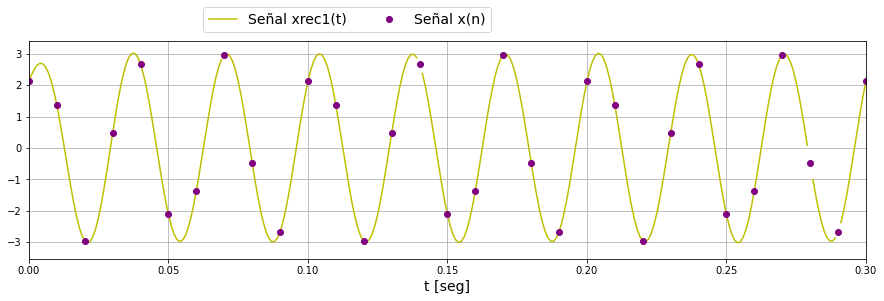

In [36]:
#Reconstrucción sin hacer el espectro

xrec = h(50000,1000,xn[0:49],100) # h(n, Fs, datos, Fs1) ... Fs >> Fs1
t1 = np.arange(len(xrec))/1000
n = np.arange(0,len(t))

plt.figure(figsize=(15,4))
plt.plot(t1,xrec,c='y')
plt.plot(n/Fs,xn,'o', c='purple')
plt.grid()
plt.xlabel('t [seg]', fontsize=14)
plt.legend(('Señal xrec1(t)','Señal x(n)'),prop={'size':14},ncol=2,bbox_to_anchor=(0.2,1.01))
plt.xlim(0,0.3)
plt.show()

- - -